In [26]:
import netCDF4
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, pyproj
from matplotlib import animation
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [27]:
from wand.image import Image
from wand.display import display

In [28]:
ncep_hrrr = netCDF4.Dataset('http://thredds-jumbo.unidata.ucar.edu/thredds/dodsC/grib/NCEP/HRRR/CONUS_2p5km/TwoD')

In [29]:
a = ncep_hrrr.variables['Planetary_boundary_layer_height_surface']
i = a.shape[0]
j = a.shape[1]
print i,j

87 16


In [7]:
# cnt = 0
# cnt0 = 0
# num0 = 0
# while cnt < 2:
#     cnt0 = 0
#     while cnt0 <= j:
#         print cnt0
#         print('SGP_PBLH_%04d.png' %num0)
#         if cnt0 == j:
#             cnt += 1
#         if cnt0 <= j:
#             cnt0 += 1
#         num0 += 1

0
SGP_PBLH_0000.png
1
SGP_PBLH_0001.png
2
SGP_PBLH_0002.png
3
SGP_PBLH_0003.png
4
SGP_PBLH_0004.png
5
SGP_PBLH_0005.png
6
SGP_PBLH_0006.png
7
SGP_PBLH_0007.png
8
SGP_PBLH_0008.png
9
SGP_PBLH_0009.png
10
SGP_PBLH_0010.png
11
SGP_PBLH_0011.png
12
SGP_PBLH_0012.png
13
SGP_PBLH_0013.png
14
SGP_PBLH_0014.png
15
SGP_PBLH_0015.png
16
SGP_PBLH_0016.png
0
SGP_PBLH_0017.png
1
SGP_PBLH_0018.png
2
SGP_PBLH_0019.png
3
SGP_PBLH_0020.png
4
SGP_PBLH_0021.png
5
SGP_PBLH_0022.png
6
SGP_PBLH_0023.png
7
SGP_PBLH_0024.png
8
SGP_PBLH_0025.png
9
SGP_PBLH_0026.png
10
SGP_PBLH_0027.png
11
SGP_PBLH_0028.png
12
SGP_PBLH_0029.png
13
SGP_PBLH_0030.png
14
SGP_PBLH_0031.png
15
SGP_PBLH_0032.png
16
SGP_PBLH_0033.png


In [34]:
var = ncep_hrrr.variables['Planetary_boundary_layer_height_surface']

In [35]:
def lat_lons(open_dap_dataset, proj_key = 'LambertConformal_Projection'):
    xg, yg = np.meshgrid(open_dap_dataset.variables['x'][:]*1000.0, open_dap_dataset.variables['y'][:]*1000.0)
    pnyc = pyproj.Proj(proj = 'lcc', 
                       lat_1 = open_dap_dataset.variables[proj_key].latitude_of_projection_origin,
                       lat_2 = open_dap_dataset.variables[proj_key].latitude_of_projection_origin,
                       lat_0 = open_dap_dataset.variables[proj_key].latitude_of_projection_origin,
                       lon_0 = open_dap_dataset.variables[proj_key].longitude_of_central_meridian )
    return pnyc(xg, yg, inverse = True)

In [37]:
lon, lat = lat_lons(ncep_hrrr)

<matplotlib.colorbar.Colorbar instance at 0x103999a70>

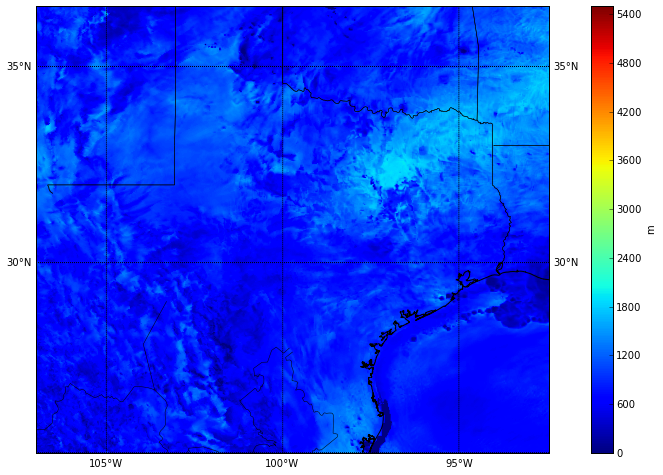

In [53]:
f = plt.figure(figsize = [15,8])
z = ncep_hrrr.variables['Planetary_boundary_layer_height_surface']
m = Basemap(llcrnrlon = -107,llcrnrlat = 25, urcrnrlon = -92.44,
               urcrnrlat = 36.5, projection = 'mill', area_thresh =1000,
               resolution='h')
m.pcolormesh(x, y, z[0,15,:,:], vmin = 0, vmax = 5500)
m.drawparallels(np.linspace(10, 50, 9) ,labels=[1,1,0,0])
m.drawmeridians(np.linspace(-110, -80,7),labels=[0,0,0,1]) 
m.drawstates()
m.drawcoastlines()
plt.colorbar(label='m')

In [43]:
var1 = ncep_hrrr.variables['Planetary_boundary_layer_height_surface']

In [44]:
a = var1

In [45]:
print a.dimensions
print a.shape[0]
print a.shape[1]

(u'reftime', u'time1', u'y', u'x')
87
16


In [46]:
i = a.shape[0]
j = a.shape[1]

In [49]:
print i, j

87 16


/Users/jpan/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


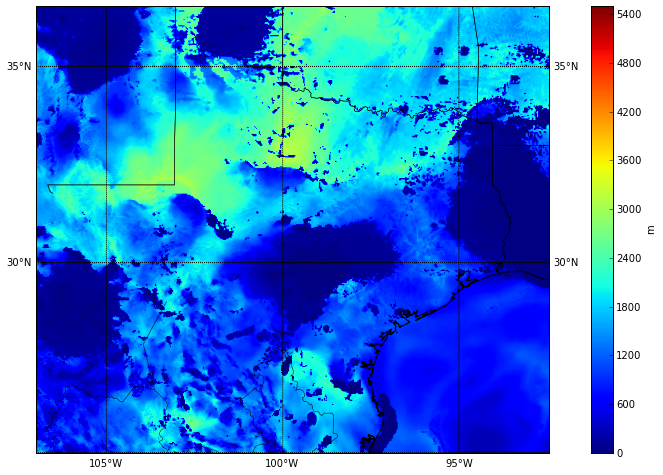

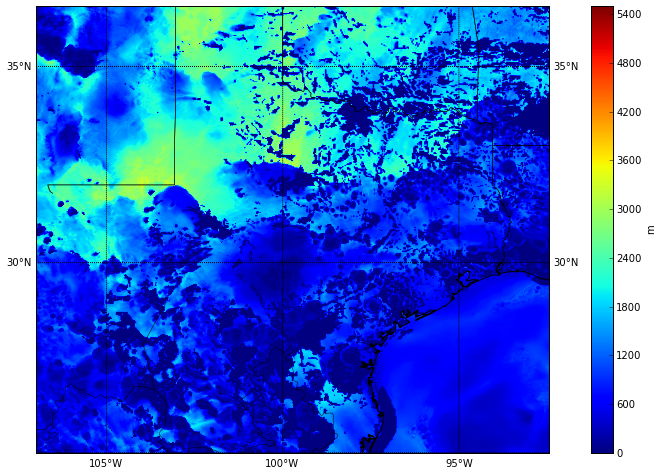

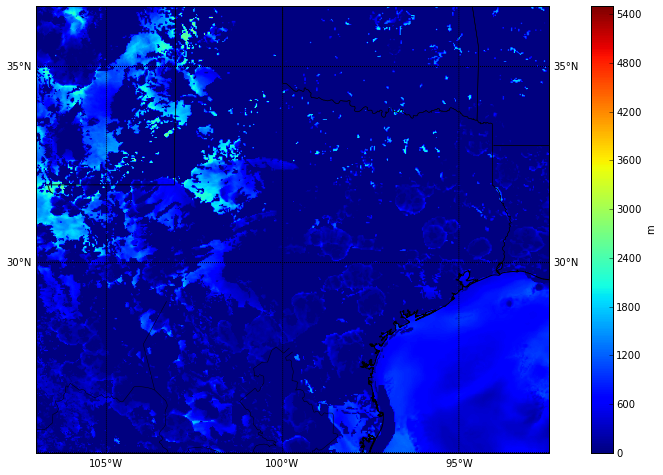

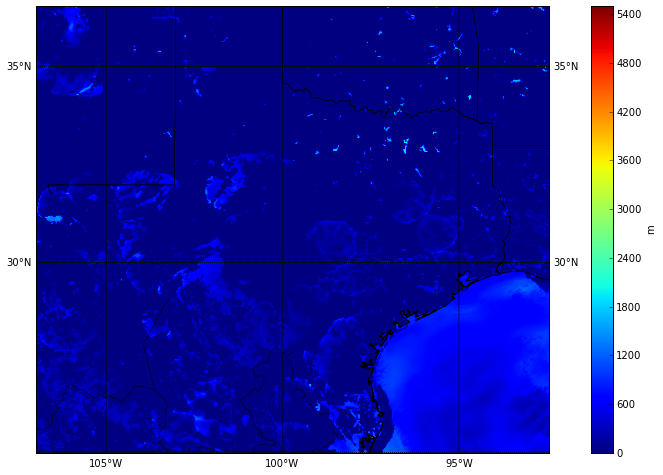

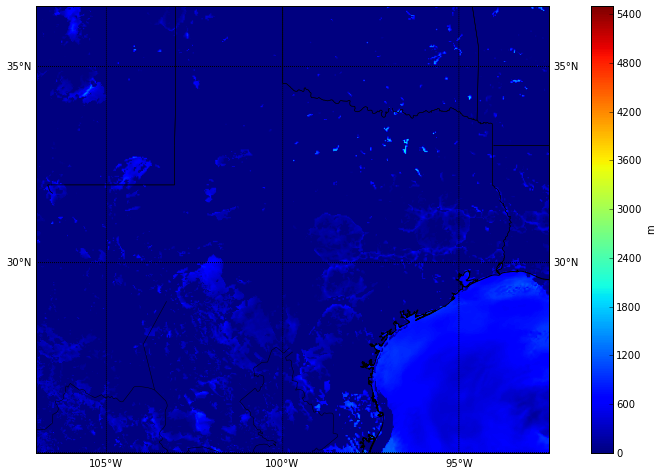

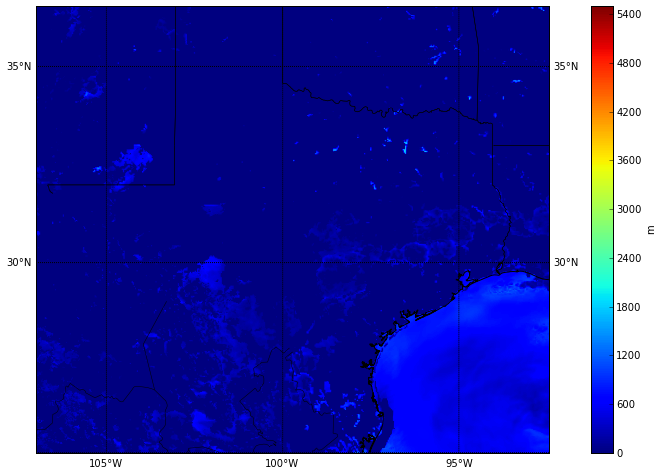

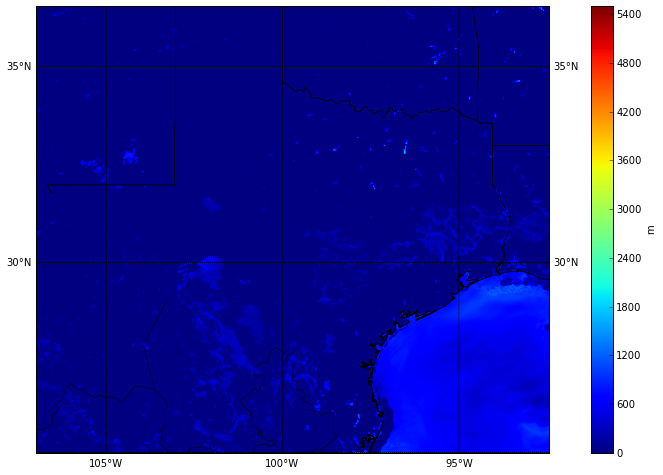

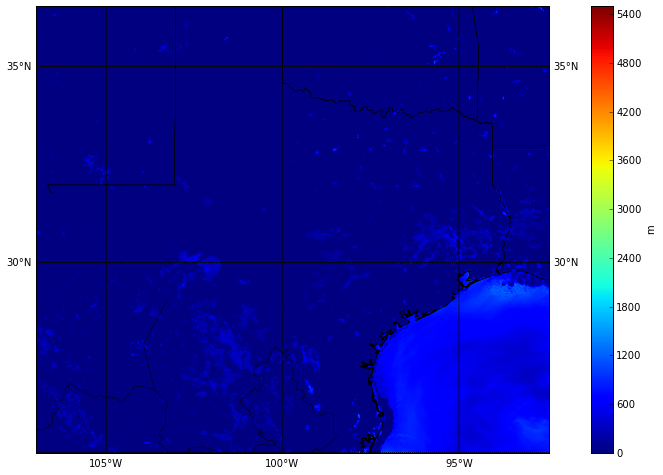

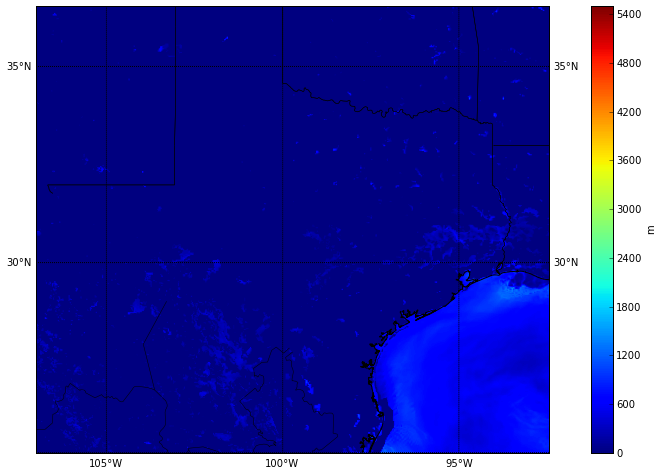

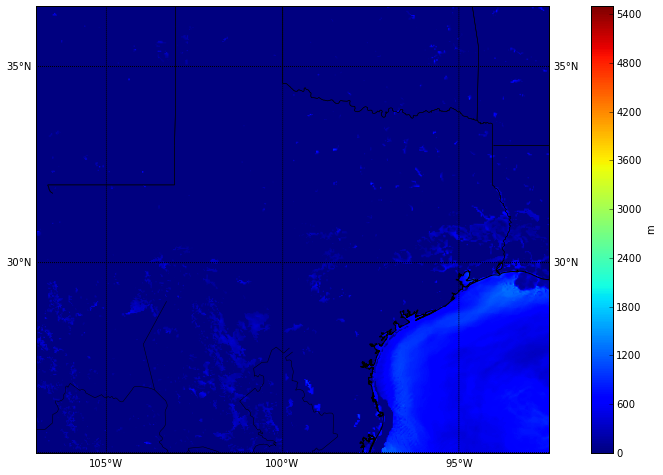

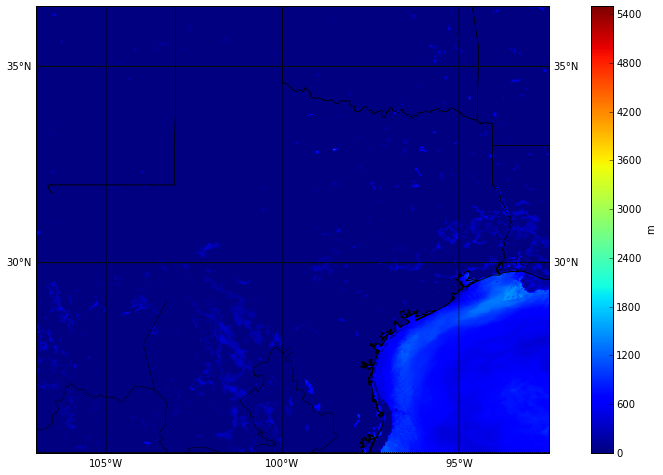

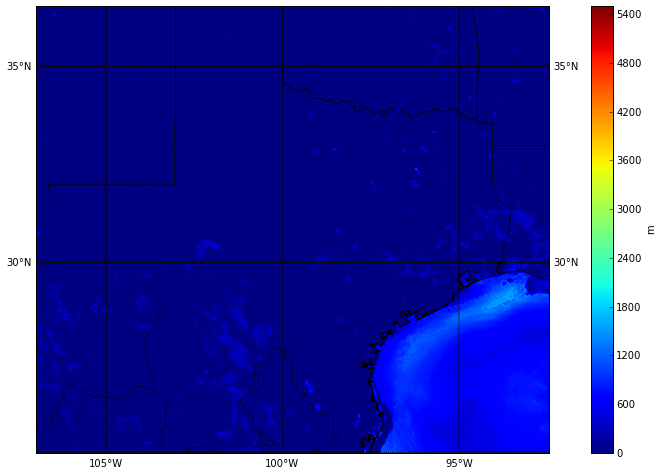

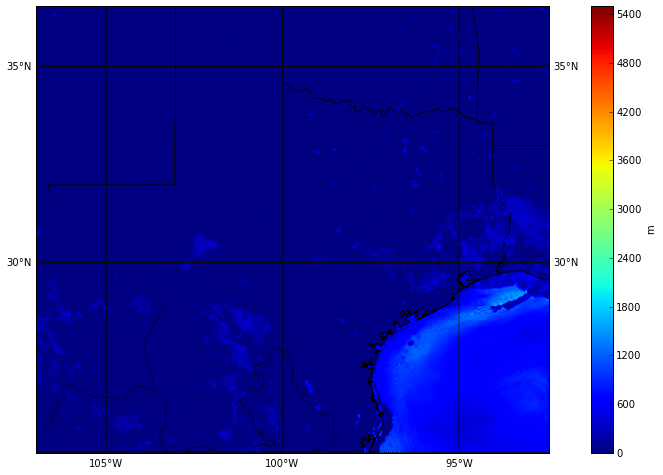

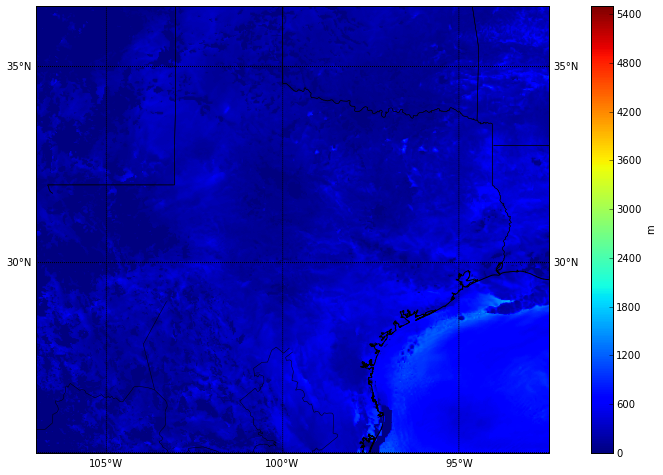

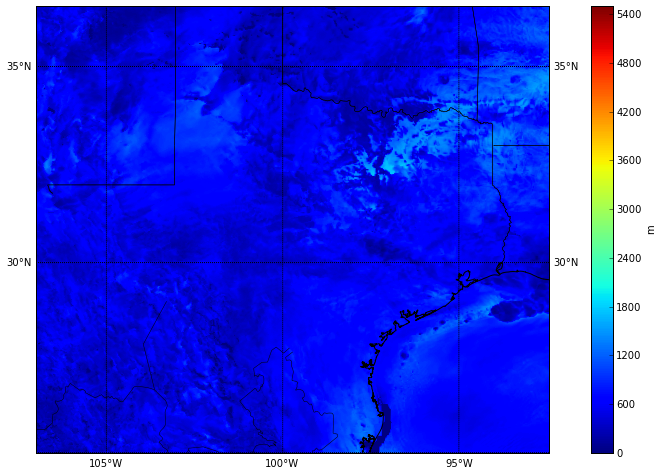

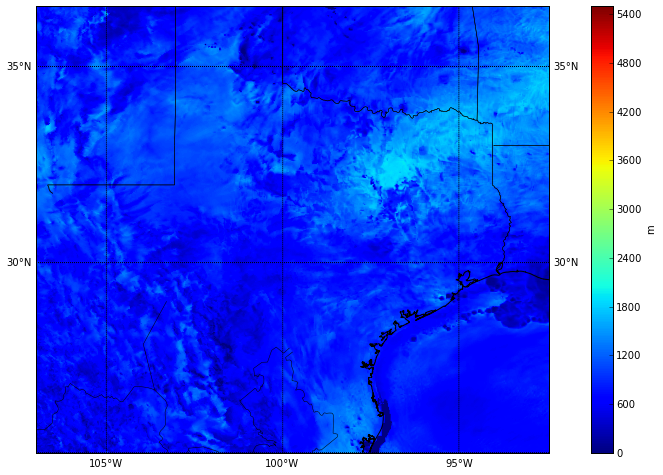

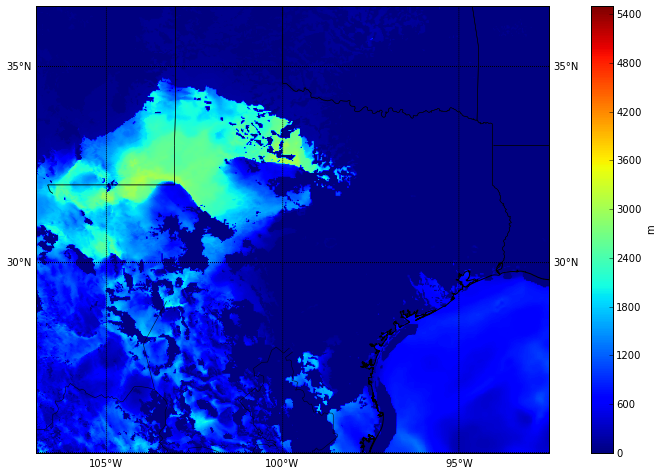

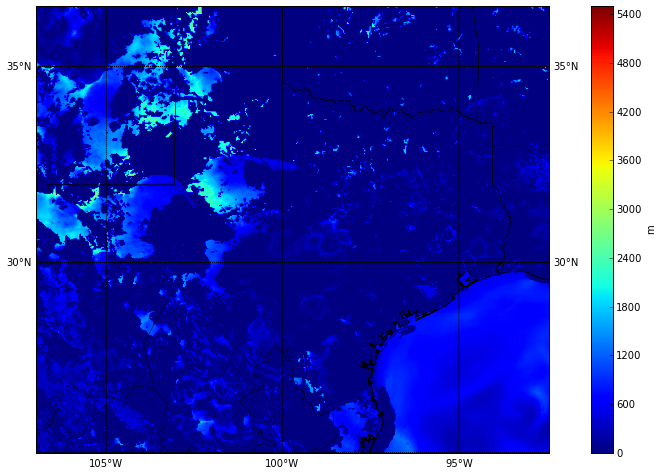

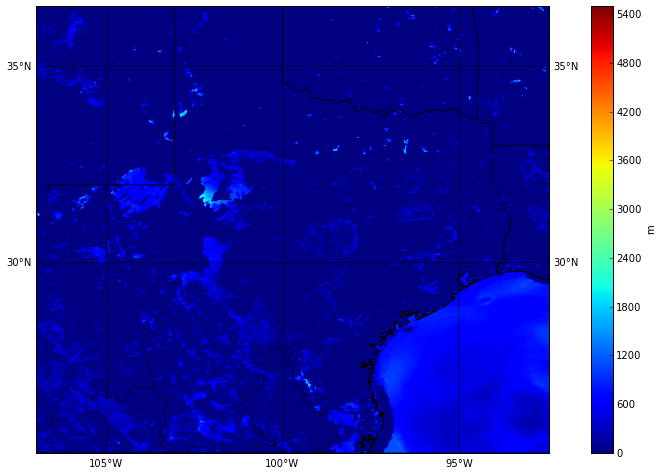

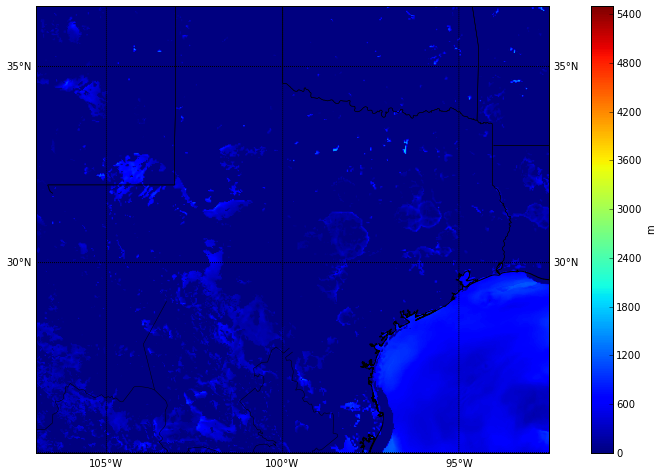

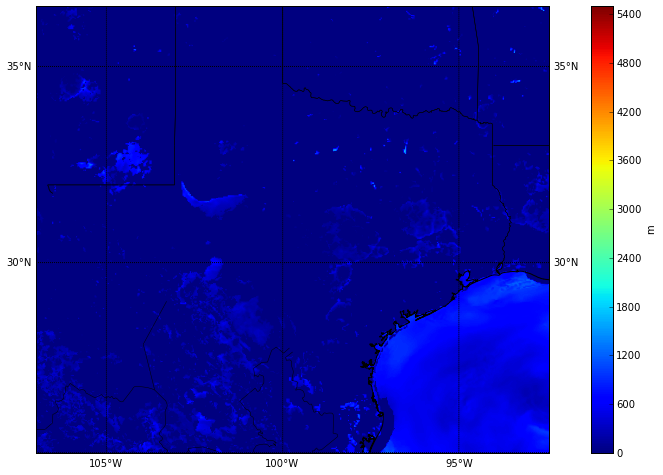

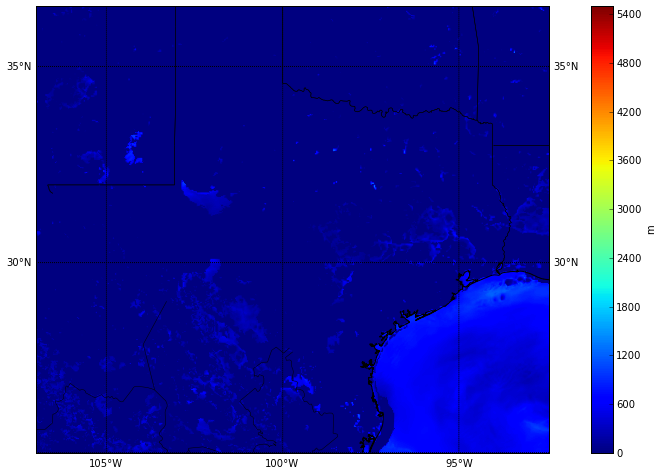

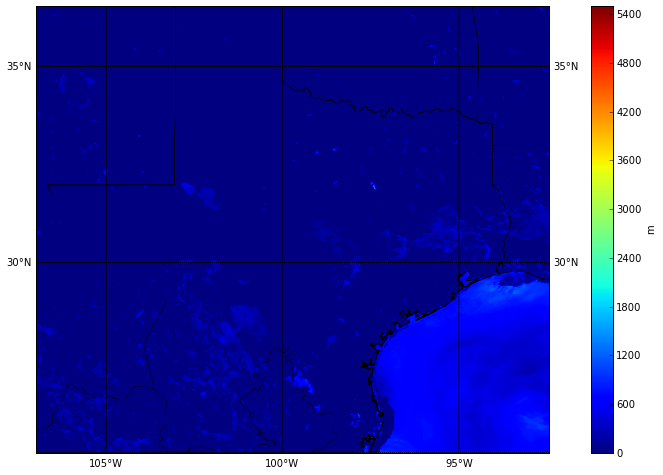

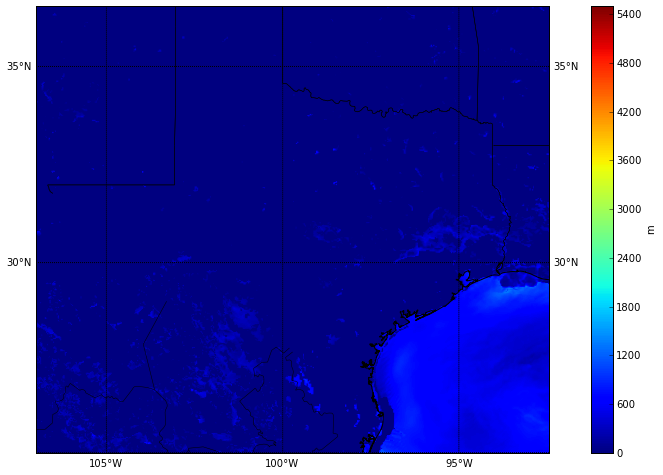

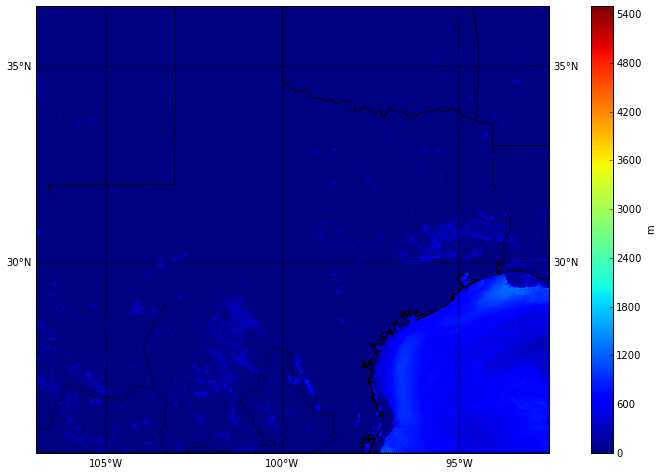

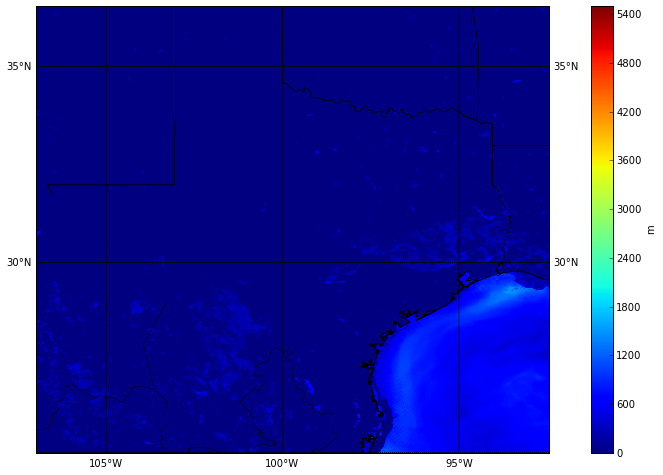

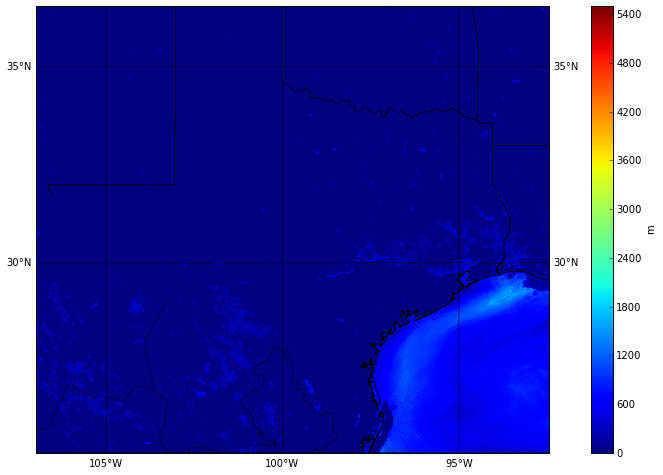

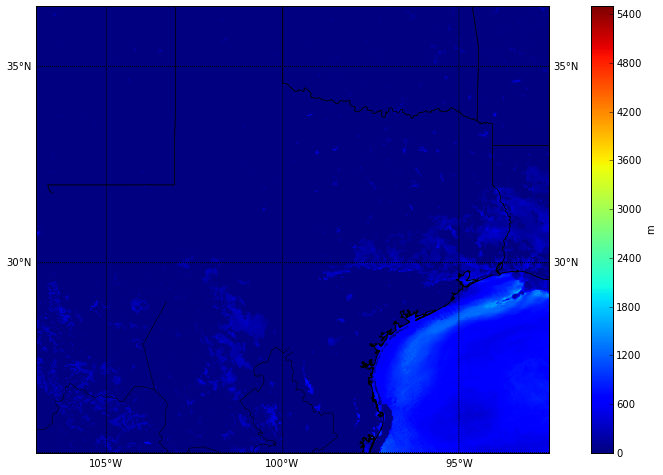

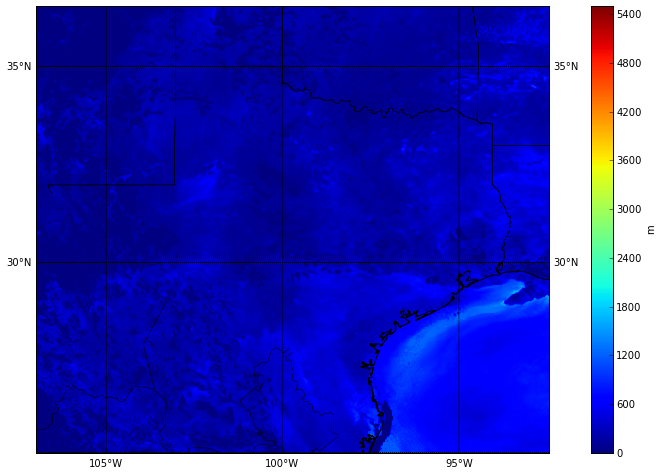

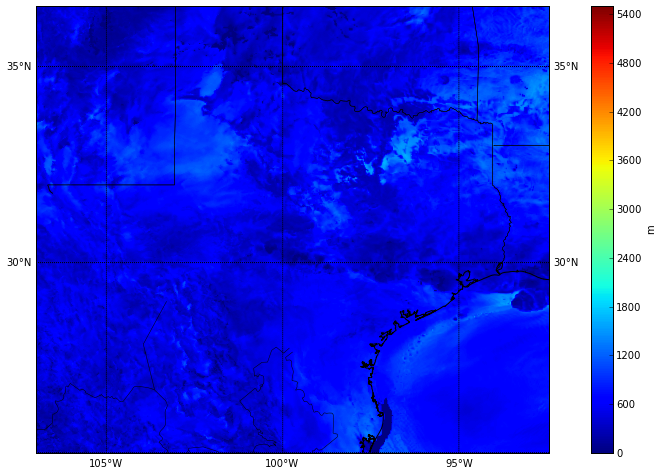

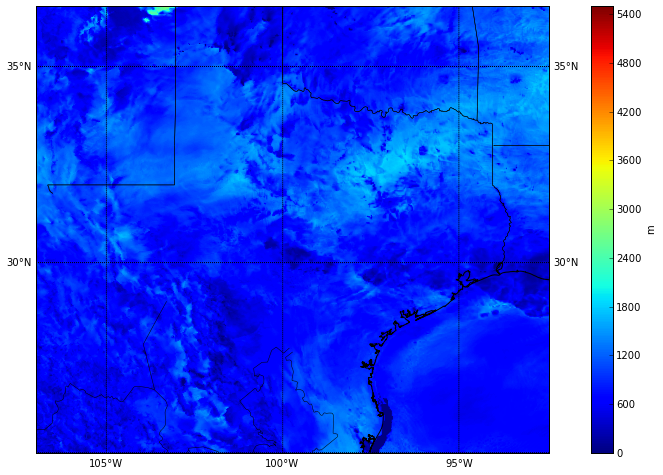

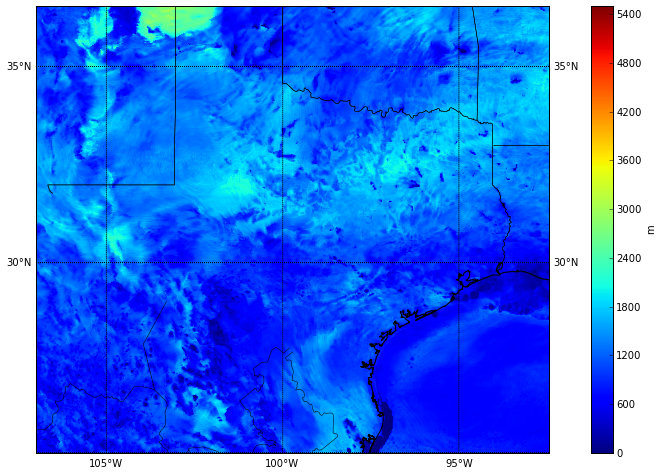

In [52]:
count = 0
count1 = 0
num = 0
i = a.shape[0]
j = a.shape[1]
while count < 2:
    count1 = 0
    while count1 < j:
        f = plt.figure(figsize = [15,8])
        m = Basemap(llcrnrlon = -107,llcrnrlat = 25, urcrnrlon = -92.44,
                   urcrnrlat = 36.5, projection = 'mill', area_thresh =1000,
                   resolution='h')
        x,y = m(lon, lat)
        z = ncep_hrrr.variables['Planetary_boundary_layer_height_surface']
        m.pcolormesh(x, y, z[count,count1,:,:], vmin = 0, vmax = 5500)
        m.drawparallels(np.linspace(10, 50, 9) ,labels=[1,1,0,0])
        m.drawmeridians(np.linspace(-110, -80,7),labels=[0,0,0,1]) 
        m.drawstates()
        m.drawcoastlines()
        plt.colorbar(label='m')
        savefig('PBLH_%04d.png' %num)
        if count1 == j-1:
            count += 1
        if count1 <= j-1:
            count1 += 1
        num += 1

KeyboardInterrupt: 

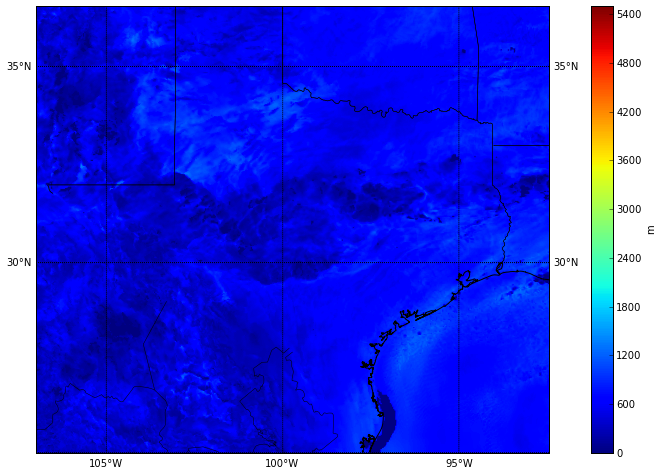

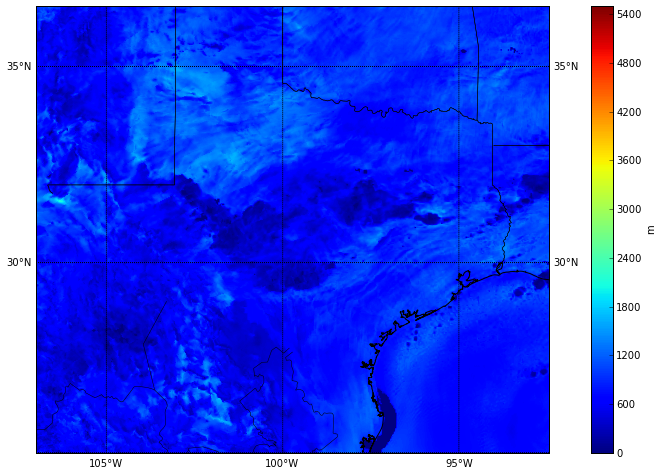

KeyboardInterrupt: 

In [17]:
count = 0
count1 = 14
num = 0
i = a.shape[0]
j = a.shape[1]
while count < 2:
    while count1 < j:
        f = plt.figure(figsize = [15,8])
        z = ncep_hrrr.variables['Planetary_boundary_layer_height_surface']
        m = Basemap(llcrnrlon = -107,llcrnrlat = 25, urcrnrlon = -92.44,
                   urcrnrlat = 36.5, projection = 'mill', area_thresh =1000,
                   resolution='h')
        x, y = m(lon, lat)
        m.pcolormesh(x, y, z[count,count1,:,:], vmin = 0, vmax = 5500)
        m.drawparallels(np.linspace(10, 50, 9) ,labels=[1,1,0,0])
        m.drawmeridians(np.linspace(-110, -80,7),labels=[0,0,0,1]) 
        m.drawstates()
        m.drawcoastlines()
        plt.colorbar(label='m')
        savefig('PBLH_%04d.png' %num)
        if count1 == j-1:
            count1 = 0
        else:
            count1 += 1
        num += 1
    count += 1

<matplotlib.colorbar.Colorbar instance at 0x1121c4758>

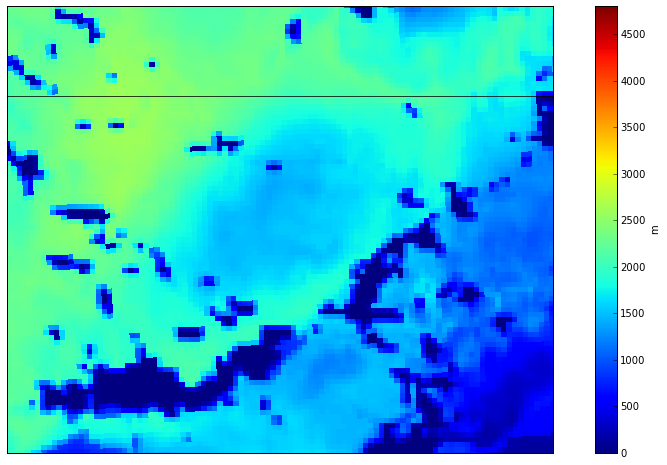

In [25]:
f = plt.figure(figsize = [15,8])
m0 = Basemap(llcrnrlon = -99,llcrnrlat = 35.4, urcrnrlon = -96.2,
               urcrnrlat = 37.4, projection = 'mill', area_thresh =1000,
               resolution='h')

x, y = m0(lon, lat)
m0.pcolormesh(x,y,ncep_hrrr.variables['Planetary_boundary_layer_height_surface'][0,0,:,:], \
              vmin=0, vmax = 4800)
m0.drawstates()
m0.drawcoastlines(linewidth = 1.25)
m0.drawparallels(np.linspace(10,50, 9) ,labels=[0,0,0,0])
m0.drawmeridians(np.linspace(-110, -80,7),labels=[0,0,0,0]) 
plt.colorbar(label='m')

<matplotlib.colorbar.Colorbar instance at 0x110250ea8>

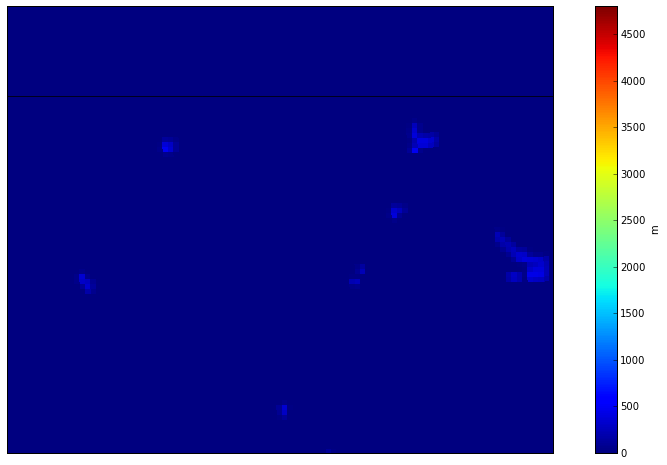

In [31]:
f = plt.figure(figsize = [15,8])
m0 = Basemap(llcrnrlon = -99,llcrnrlat = 35.4, urcrnrlon = -96.2,
               urcrnrlat = 37.4, projection = 'mill', area_thresh =1000,
               resolution='h')

x, y = m0(lon, lat)
m0.pcolormesh(x,y,ncep_hrrr.variables['Planetary_boundary_layer_height_surface'][0,11,:,:], \
              vmin=0, vmax = 4800)
m0.drawstates()
m0.drawcoastlines(linewidth = 1.25)
m0.drawparallels(np.linspace(10,50, 9) ,labels=[0,0,0,0])
m0.drawmeridians(np.linspace(-110, -80,7),labels=[0,0,0,0]) 
plt.colorbar(label='m')

In [36]:
print a.shape

(90, 16, 1377, 2145)


In [38]:
print i, j

 90 16


IndexError: 

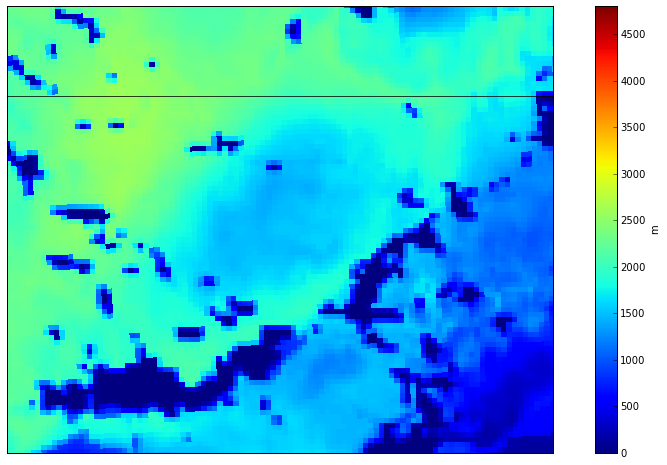

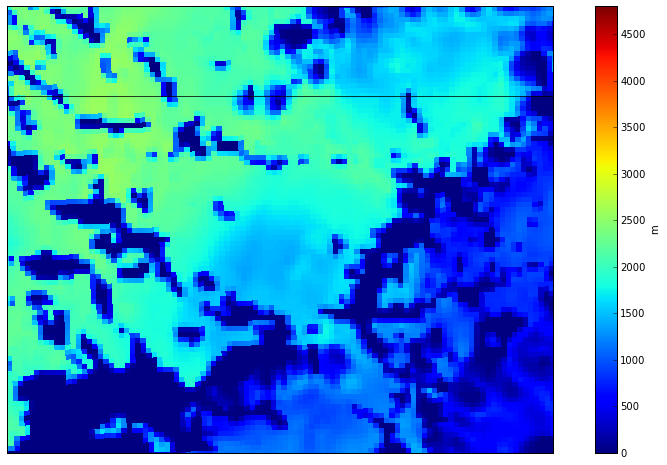

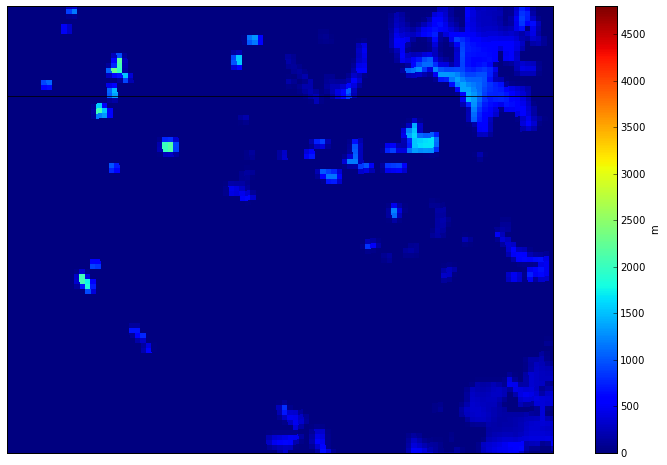

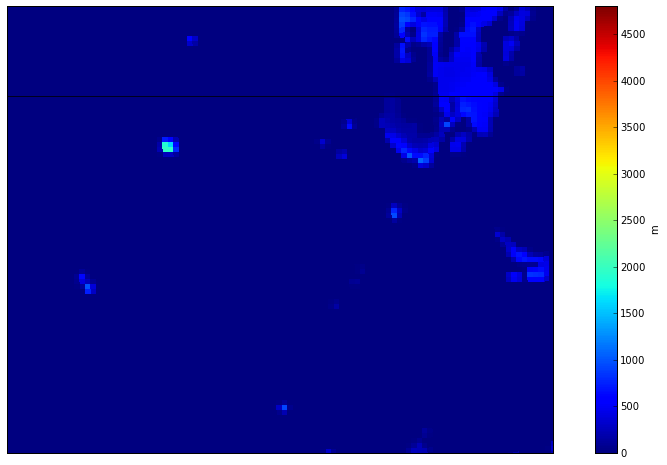

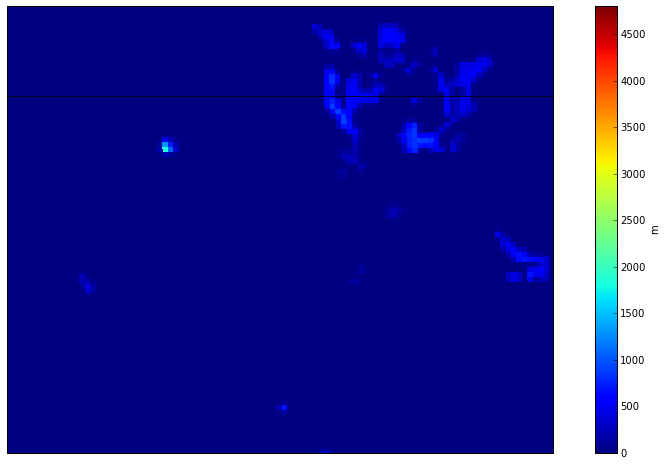

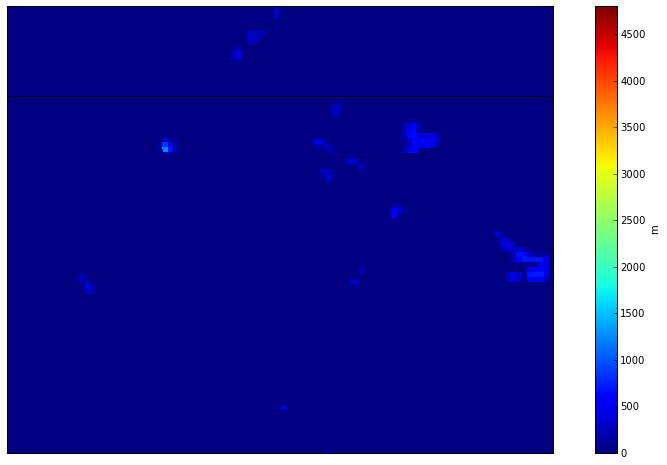

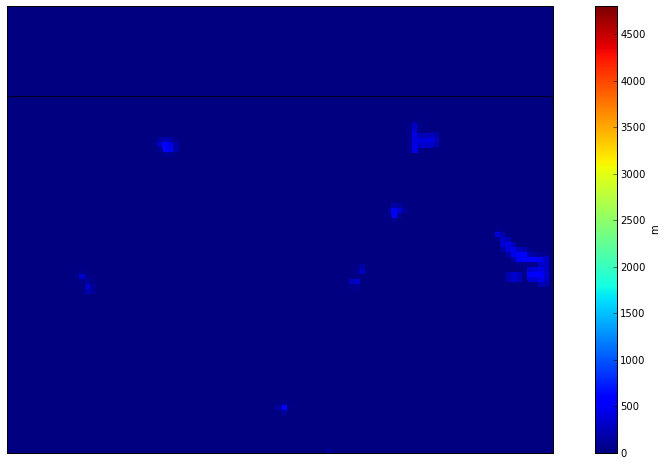

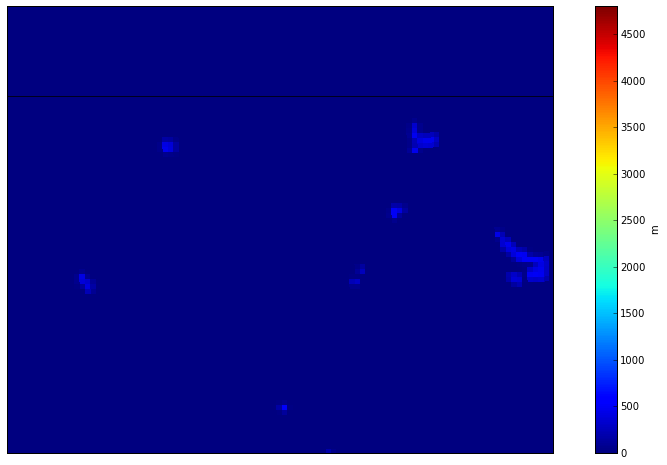

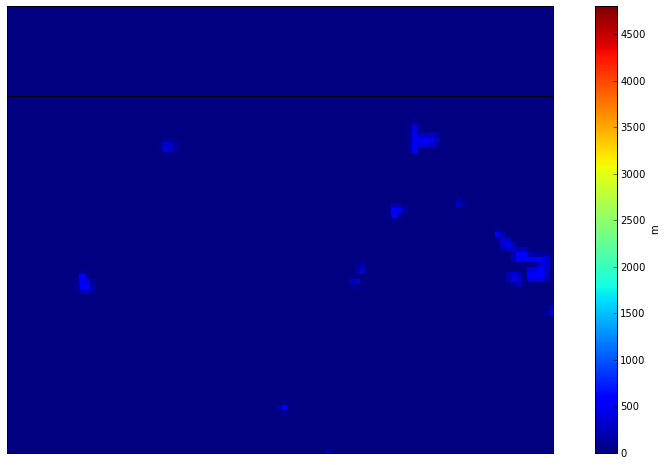

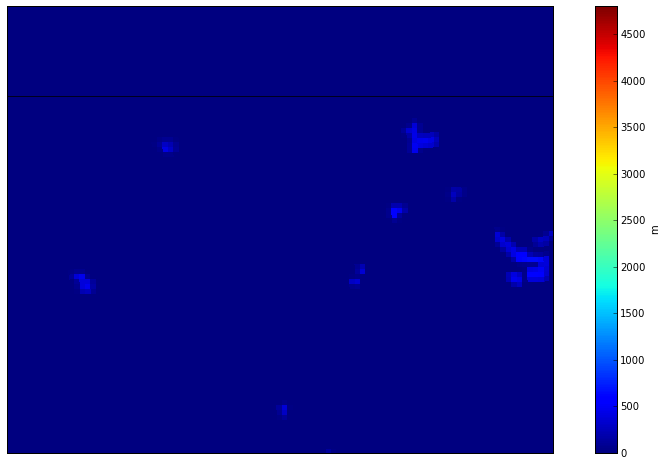

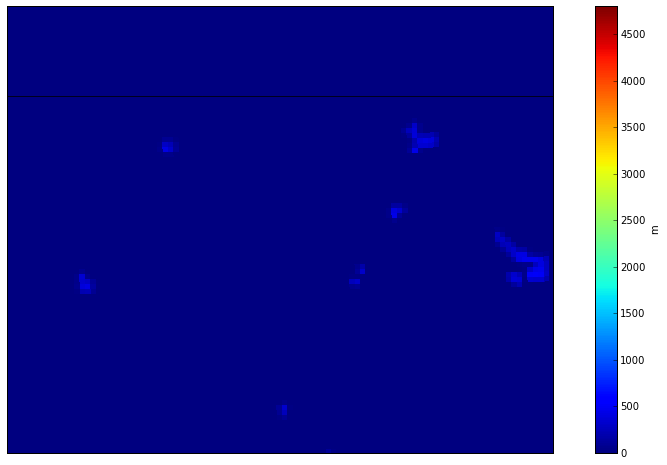

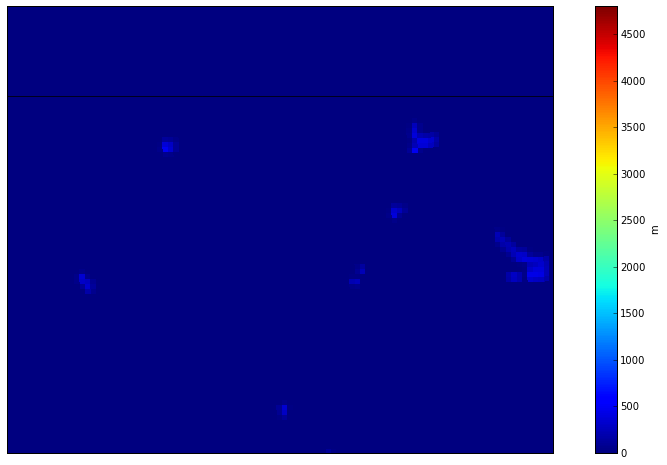

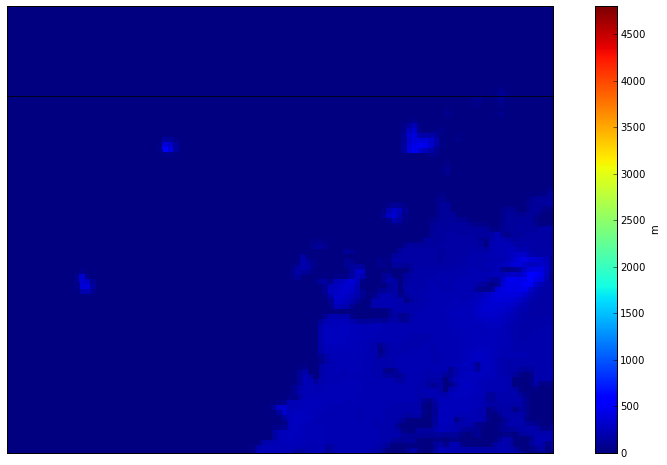

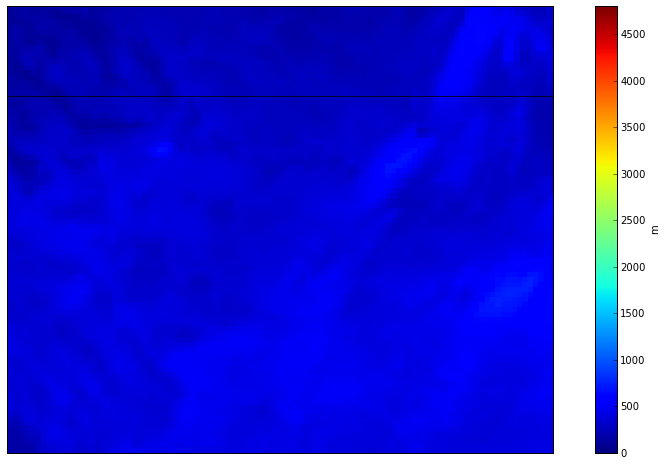

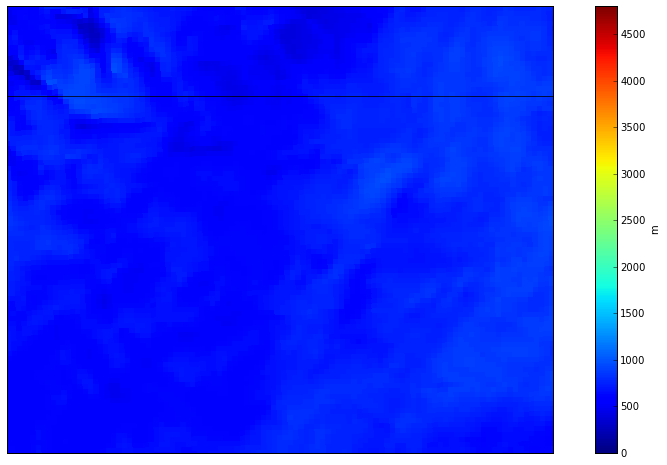

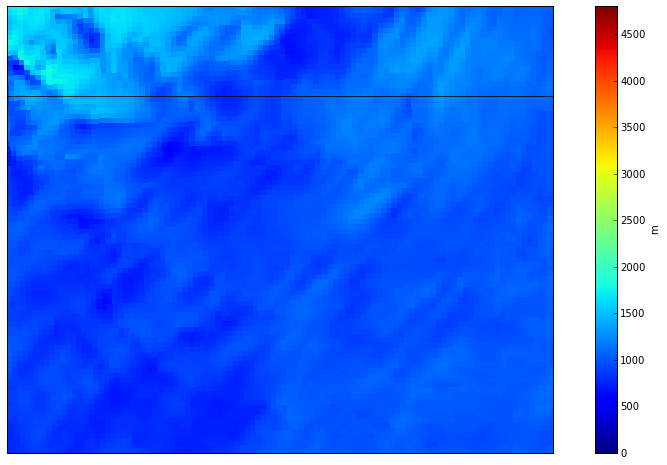

In [35]:
count2 = 0
count3 = 0
num1 = 0
a = ncep_hrrr.variables['Planetary_boundary_layer_height_surface']
i = a.shape[0]
j = a.shape[1]
while count2 < 2:
    while count3 <= j:
        f = plt.figure(figsize = [15,8])
        m0 = Basemap(llcrnrlon = -99,llcrnrlat = 35.4, urcrnrlon = -96.2,
               urcrnrlat = 37.4, projection = 'mill', area_thresh =1000,
               resolution='h')
        z = ncep_hrrr.variables['Planetary_boundary_layer_height_surface']
        m0.pcolormesh(x,y,z[count2,count3,:,:], \
              vmin=0, vmax = 4800)
        m0.drawstates()
        m0.drawcoastlines(linewidth = 1.25)
        m0.drawparallels(np.linspace(10,50, 9) ,labels=[0,0,0,0])
        m0.drawmeridians(np.linspace(-110, -80,7),labels=[0,0,0,0]) 
        plt.colorbar(label='m')
        savefig('SGP_PBLH_%04d.png' %num1)
        if count3 == j:
            count3 = 0
        else:
            count3 += 1
        num1 += 1
    count2 += 1